In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('urldata.csv')
data.head()
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Label'],
      dtype='object')

In [3]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
count,11000.0,11000.000000,11000.000000,11000.000000,11000.000000,11000.0,11000.000000,11000.000000,11000.000000
mean,0.0,0.025091,0.735545,2.714455,0.013455,0.0,0.087000,0.149818,0.500000
std,0.0,0.156408,0.441062,2.149899,0.115216,0.0,0.281848,0.356909,0.500023
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,20.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [4]:
new_data = data.drop(['Domain'], axis = 1).copy()
new_data.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Label'],
      dtype='object')

In [5]:
new_data.isnull().sum()


Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
Label            0
dtype: int64

In [6]:
#selecting samples from the dataset
new_data = new_data.sample(frac=1).reset_index(drop=True)
new_data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,1,3,0,0,0,0,0
1,0,0,1,2,0,0,0,0,0
2,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,1,0,1
4,0,0,1,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10995,0,0,1,4,0,0,1,0,1
10996,0,0,0,1,0,0,0,0,1
10997,0,0,1,1,0,0,0,0,1
10998,0,0,1,4,0,0,0,0,0


In [7]:
new_data.Label.value_counts()

1    5500
0    5500
Name: Label, dtype: int64

In [8]:

# Sepratating & assigning features and target columns to X & y
y = new_data['Label']
X = new_data.drop('Label',axis=1)
X.shape, y.shape

((11000, 8), (11000,))

In [9]:
# Splitting the dataset into train and test sets: 75-25 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state = 12)
X_train.shape, X_test.shape

((8250, 8), (2750, 8))

Machine Learning Models & Training
From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning model (classification) considered to train the dataset in this notebook is:


Random Forest

SVM

Decision Tree

In [10]:
#importing packages
from sklearn.metrics import accuracy_score

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))


In [11]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

Performance Evaluation:

In [12]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.838
Random forest: Accuracy on test Data: 0.842


TP, FP, FN, TN for test data

In [13]:
cm=confusion_matrix(y_test,y_test_forest)
TP, FP, FN, TN = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
print('TP:',TP,'\nFP:',FP,'\nFN:',FN,'\nTN:',TN)
total_test=TP+FN+FP+TN
train_RF=[TP,FN,FP,TN]
a1=np.array(train_RF)
a_1=a1.reshape(1,4)

TP: 1361 
FP: 23 
FN: 412 
TN: 954


TP, FP, FN, TN for train data

In [14]:
cm=confusion_matrix(y_train,y_train_forest)
TP_train, FP_train, FN_train, TN_train = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
print('TP:',TP_train,'\nFP:',FP_train,'\nFN:',FN_train,'\nTN:',TN_train)
total =TP_train+ FP_train+ FN_train +TN_train
total

TP: 4067 
FP: 49 
FN: 1284 
TN: 2850


8250

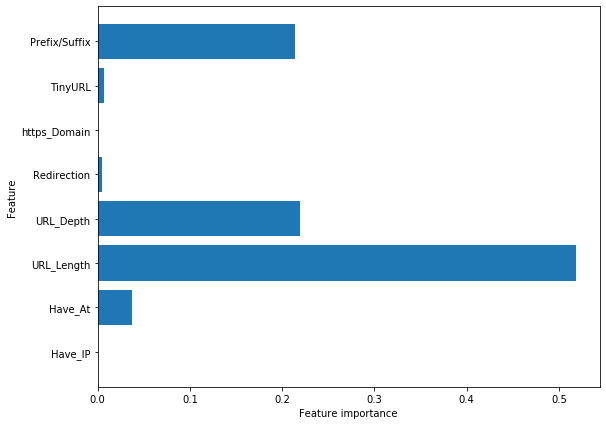

In [15]:
#checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [16]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [17]:
acc_train_forest, acc_test_forest

(0.8384242424242424, 0.8418181818181818)

SVM

y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [18]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [19]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)


Performance Evaluation:




In [20]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.836
SVM : Accuracy on test Data: 0.840


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02045
Feature: 2, Score: 0.21964
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.09573


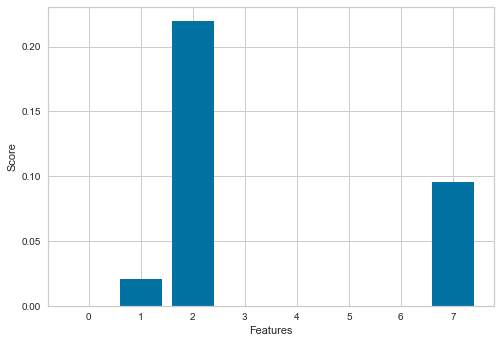

In [38]:

# permutation feature importance with knn for classification
from sklearn.datasets import make_classification

from sklearn.inspection import permutation_importance
results = permutation_importance(svm, X, y, scoring='accuracy',n_jobs=4)
# get importance
importance = results.importances_mean
# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

In [22]:
cm=confusion_matrix(y_test,y_test_svm)
TP_svm, FP_svm, FN_svm, TN_svm = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
print('TP:',TP_svm,'\nFP:',FP_svm,'\nFN:',FN_svm,'\nTN:',TN_svm)
total_test_svm=TP_svm+FN_svm+FP_svm+TN_svm
print('total:',total_test_svm)

cm=confusion_matrix(y_train,y_train_svm)
TP_train_svm, FP_train_svm, FN_train_svm, TN_train_svm = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
print('for training data')
print('TP :',TP_train_svm,'\nFP:',FP_train_svm,'\nFN:',FN_train_svm,'\nTN:',TN_train_svm)
total =TP_train_svm+ FP_train_svm+ FN_train_svm +TN_train_svm
total

TP: 1365 
FP: 19 
FN: 422 
TN: 944
total: 2750
for training data
TP : 4073 
FP: 43 
FN: 1314 
TN: 2820


8250

DECISION TREE

In [23]:

# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [24]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

Performance Evaluation:



In [25]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.838
Decision Tree: Accuracy on test Data: 0.842


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02022
Feature: 2, Score: 0.17880
Feature: 3, Score: 0.04204
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.09580


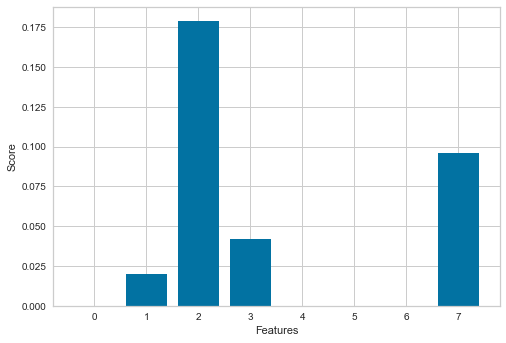

In [39]:

results = permutation_importance(tree, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

In [27]:
cm=confusion_matrix(y_test,y_test_tree)
TP_tree, FP_tree, FN_tree, TN_tree = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
print('TP:',TP_tree,'\nFP:',FP_tree,'\nFN:',FN_tree,'\nTN:',TN_tree)
total_test_tree=TP_tree+FN_tree+FP_tree+TN_tree
print('total:',total_test_tree)

cm=confusion_matrix(y_train,y_train_tree)
TP_train_tree, FP_train_tree, FN_train_tree, TN_train_tree = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
print('for training data')
print('TP :',TP_train_tree,'\nFP:',FP_train_tree,'\nFN:',FN_train_tree,'\nTN:',TN_train_tree)
total =TP_train_tree+ FP_train_tree+ FN_train_tree +TN_train_tree
total

TP: 1361 
FP: 23 
FN: 412 
TN: 954
total: 2750
for training data
TP : 4067 
FP: 49 
FN: 1284 
TN: 2850


8250

In [28]:
from sklearn.metrics import *


print("precision score  random forests" ,precision_score(y_test,y_test_forest))
print('Recall score Random Forests  ',recall_score(y_test,y_test_forest))
print("F-Measure Random Forest  ",f1_score(y_test,y_test_forest))


precision score  random forests 0.9764585465711362
Recall score Random Forests   0.698389458272328
F-Measure Random Forest   0.8143405889884764


Confusion Matrix Graph RF

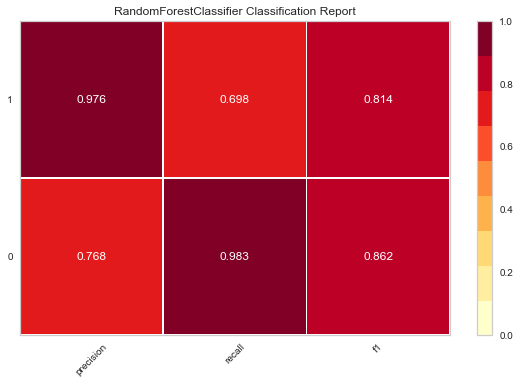

In [29]:
from yellowbrick.classifier import *
visualize=ClassificationReport(forest)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

Confusion Matrix Graph SVM

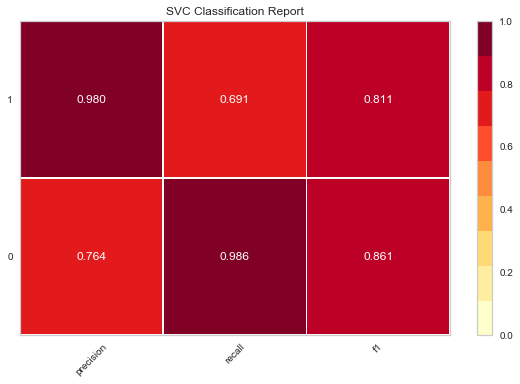

In [30]:
from yellowbrick.classifier import *
visualize=ClassificationReport(svm)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

CONFUSION MATRIX FOR DT

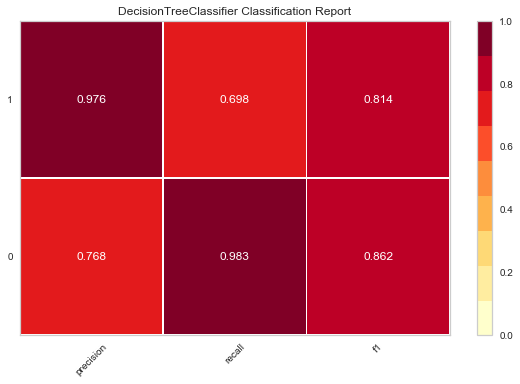

In [31]:
from yellowbrick.classifier import *
visualize=ClassificationReport(tree)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

In [35]:

#creating dataframe
models=['Random Forest','SVM','Decsion Tree']
trainAcc=[acc_train_forest, acc_train_svm,acc_train_tree]
testAcc=[acc_test_forest,acc_test_svm,acc_test_tree]
results = pd.DataFrame({ 'ML Model': models,  
    'Train Accuracy': trainAcc,
    'Test Accuracy': testAcc})
results

,ML Model,Train Accuracy,Test Accuracy
0,Random Forest,0.838424,0.841818
1,SVM,0.835515,0.839636
2,Decsion Tree,0.838424,0.841818


In [34]:
#creating dataframe for TP,FP,FN,TN
models=['Random Forest','SVM','Decsion Tree']
columns=['TP','FP','FN','TN']
test=[TP,TP_svm,TP_tree,TP]
result = pd.DataFrame({ 'Confusion ': columns,  
    'Random Forest ': a1,
    'SVM':[TP_svm,FP_svm,FN_svm,TN_svm] ,'Decision Tree':[TP_tree,FN_tree,FP_tree,TN_tree]})
result

,Confusion,Random Forest,SVM,Decision Tree
0,TP,1361,1365,1361
1,FP,412,19,412
2,FN,23,422,23
3,TN,954,944,954
